# Wine review
Exploratory data analysis of wine review given by diffirent customer and tasters across diffirent countries.

In [1]:
#install lib
!pip3 install squarify
!pip3 install seaborn
!pip3 install wordcloud
!pip3 install missingno
!pip3 install -U scikit-learn

     |████████████████████████████████| 292 kB 3.0 MB/s            
     |████████████████████████████████| 435 kB 15.6 MB/s            
     |████████████████████████████████| 22.2 MB 192 kB/s             
     |████████████████████████████████| 309 kB 37.5 MB/s            


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import missingno as msno
import squarify

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size':12})

## Read data set

In [3]:
#path = 'dataset/'
path = 'data/'
wine_150k = pd.read_csv(path + 'winemag-data_first.csv',index_col=0)
wine_130k = pd.read_csv(path + 'winemag-data.csv',index_col=0)
wine = pd.concat([wine_150k,wine_130k],axis=0)
#wine = wine_150k
print("Number of rows and columns:",wine.shape)

Number of rows and columns: (280901, 13)


In [4]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


## Data analysis

In [5]:
wine.describe(include='all',).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,280833,50,US,116901,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,280901,169430,A little bit funky and unsettled when you pop ...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
designation,197701,47239,Reserve,4761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
points,280901,NaN,NaN,NaN,88.1469,3.15153,80,86,88,90,100
price,258210,NaN,NaN,NaN,34.1772,38.6117,4,16,25,40,3300
province,280833,490,California,80755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_1,234594,1332,Napa Valley,10689,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_2,111464,18,Central Coast,24122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variety,280900,756,Pinot Noir,27563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
winery,280901,19186,Williams Selyem,585,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing values

<AxesSubplot:>

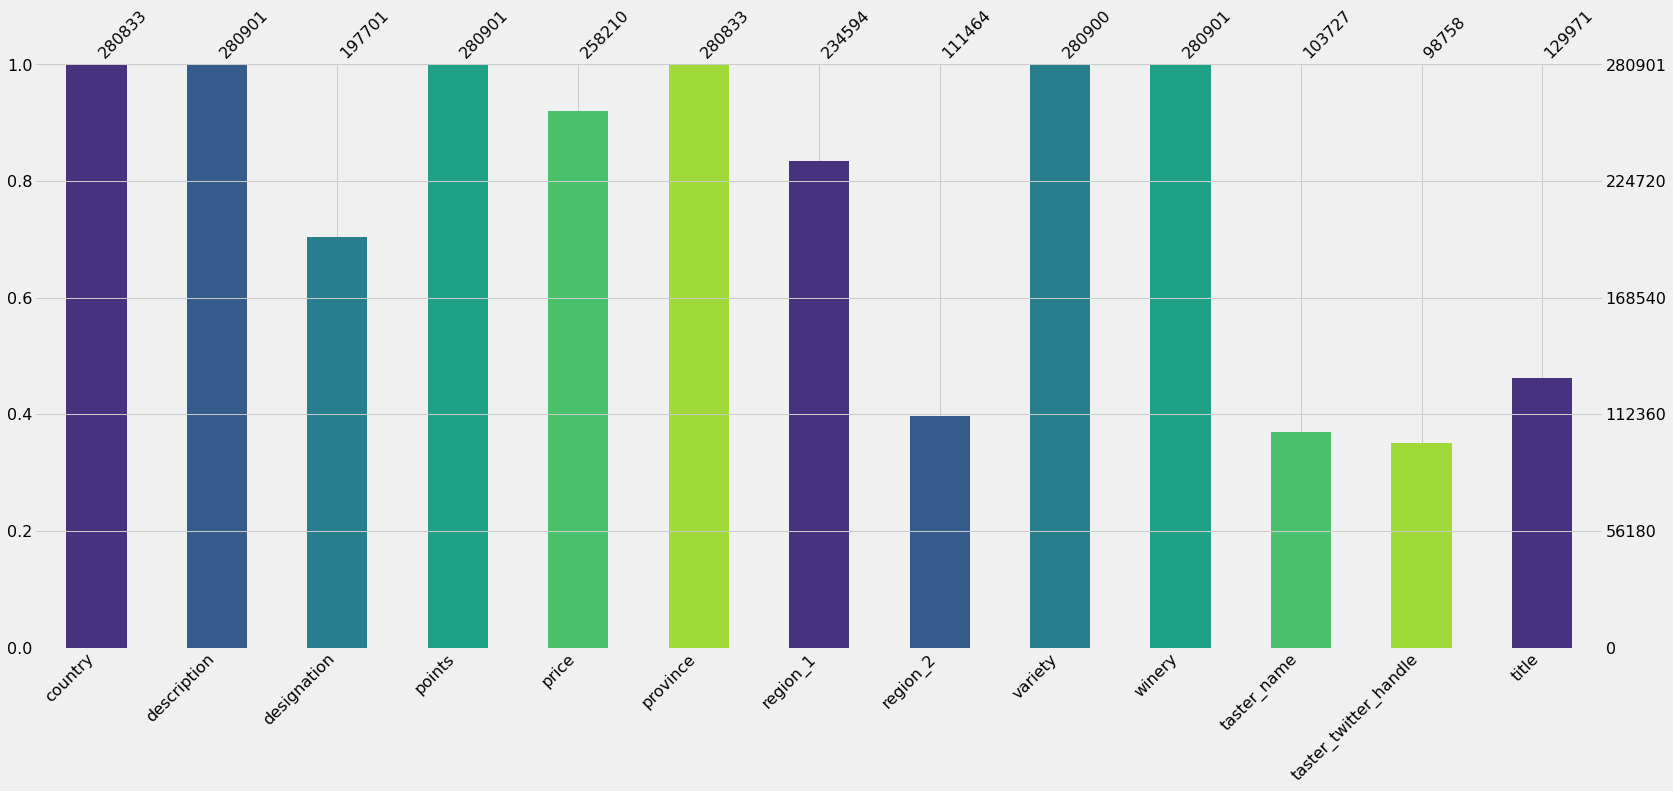

In [6]:
msno.bar(wine,color= sns.color_palette('viridis'))

## Distribution of Wine Reviews by Top 20 Countries

Number of country list in data: 50


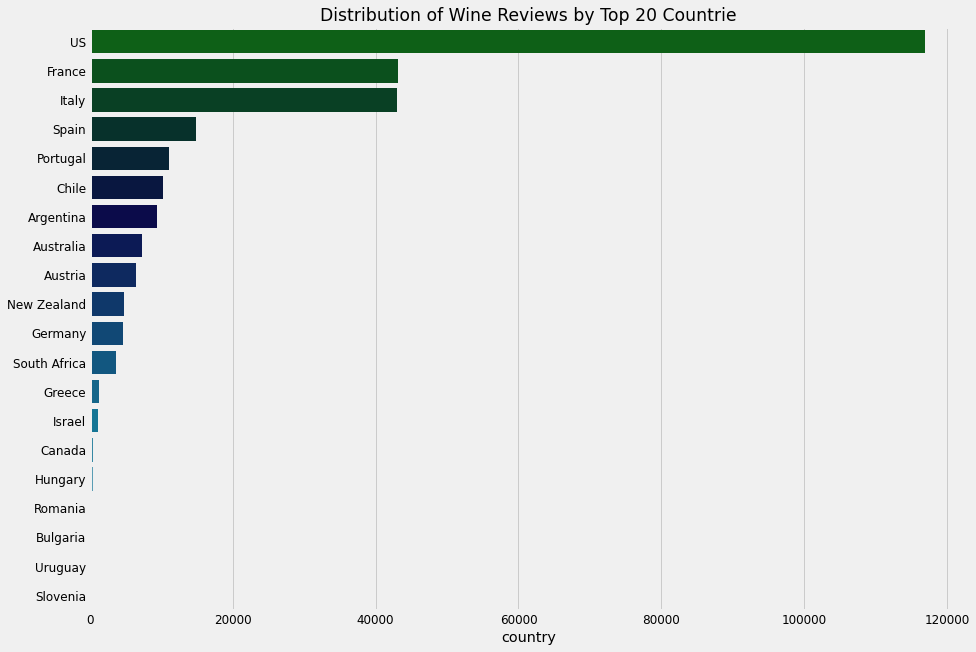

In [7]:
print('Number of country list in data:',wine['country'].nunique())
plt.figure(figsize=(14,10))
cnt = wine['country'].value_counts().to_frame()[0:20]
#plt.xscale('log')
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Distribution of Wine Reviews by Top 20 Countrie');

* Us contribute more in the review
* The wine review for 50 countries in the dataset
***
## Distribution of wine price

/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Boxplot of price')

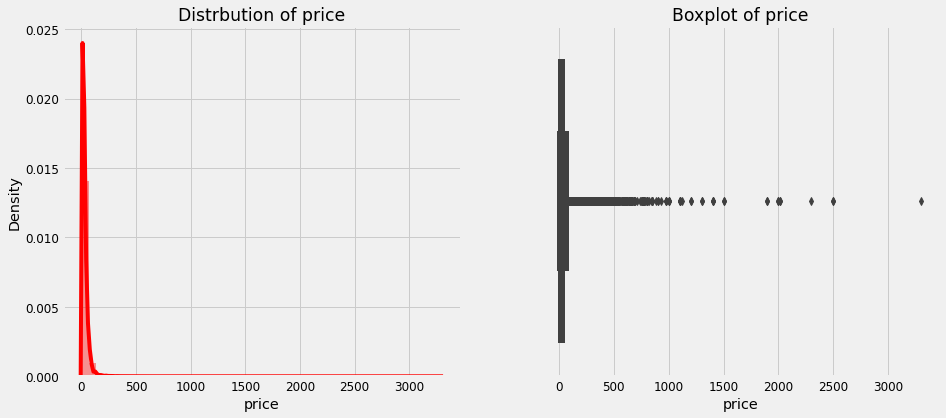

In [8]:
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(wine['price'].fillna(wine['price'].mean()),color='r',ax=ax1)
ax1.set_title('Distrbution of price')
sns.boxplot(x = wine['price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')

* The price of wine is starts from 4 to more than 3000. 
* The price mean and median price is less than 100,
* Thier is many outliers in the data

## Country wise average wine price

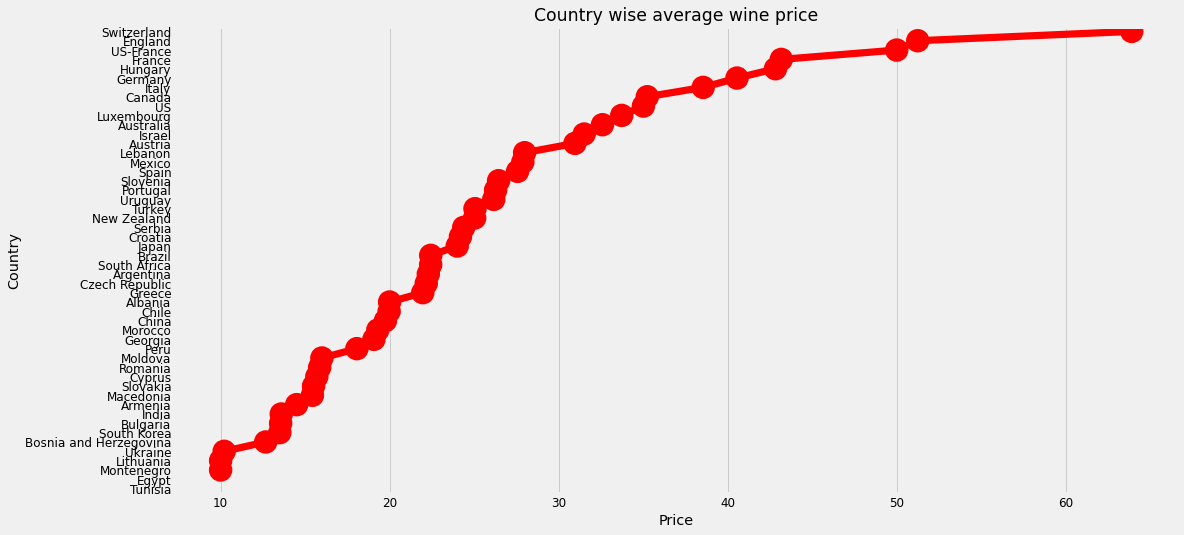

In [9]:
cnt = wine.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='r',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

<AxesSubplot:>

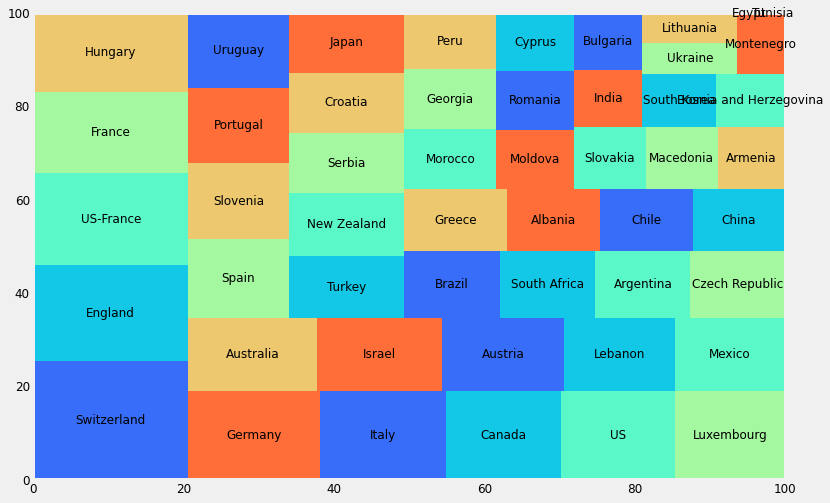

In [10]:
cnt = wine.groupby(['country',])['price'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,8))
squarify.plot(cnt['price'].fillna(0.1),color=sns.color_palette('rainbow'),label=cnt.index)

* The average price of wine in 'Switzerland' is highest.
* The country named 'Us-France' is present in data set, may wine manufacture in france is sold in US. 
***
## Country wise Expensive and Least price wine

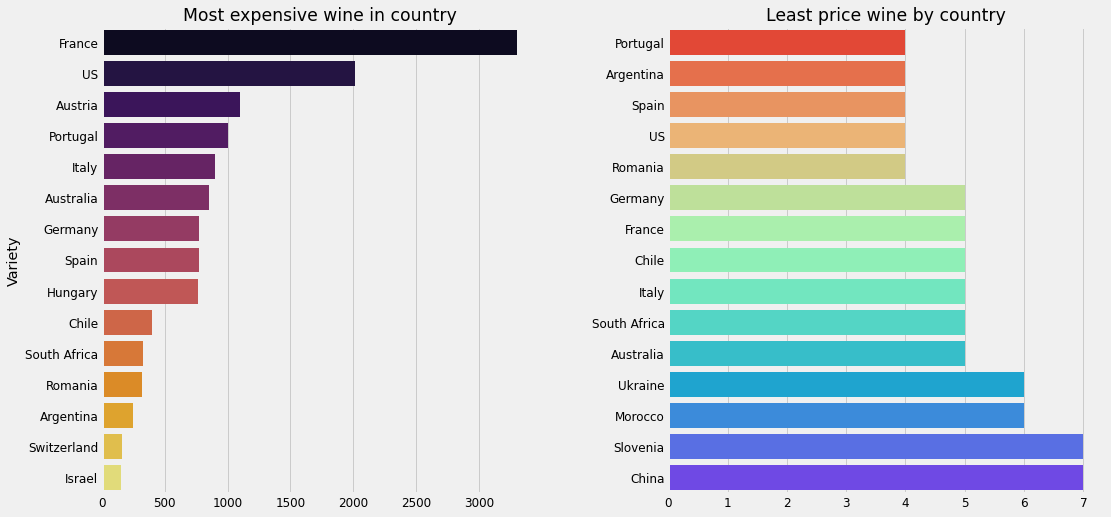

In [11]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'inferno',ax=ax1)
ax1.set_title('Most expensive wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'rainbow_r',ax=ax2)
ax2.set_title('Least price wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

* The France is selling expensive wine followed by US Austria.
* The least price wine availabe at 4 bucks at Portugal, Argentian,Spain,Romania and also US.
* The most of European countries are selling wide range of wine.
***

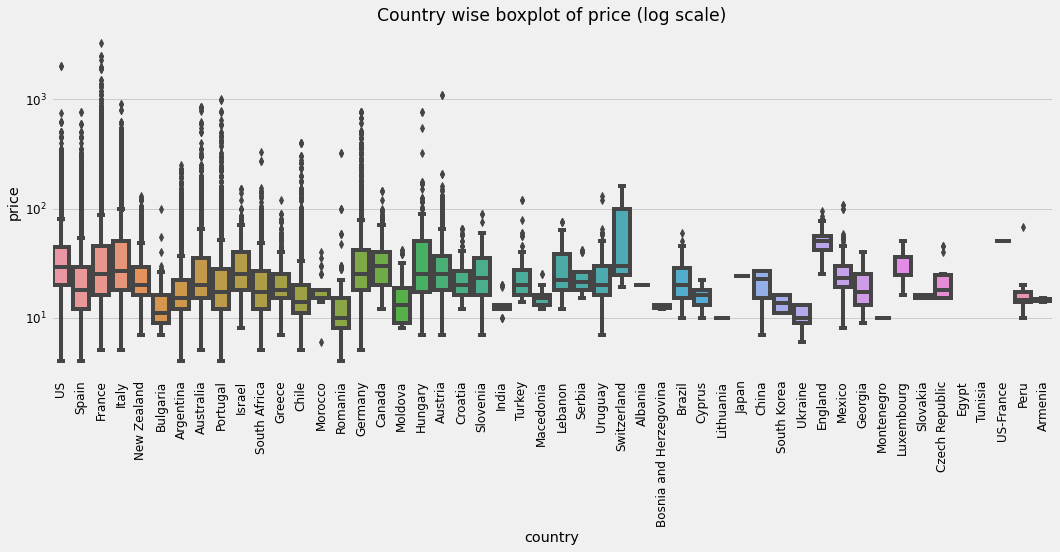

In [12]:
plt.figure(figsize=(16,6))
sns.boxplot(x = wine['country'], y = wine['price'])
plt.yscale("log")
plt.title('Country wise boxplot of price (log scale)')
plt.xticks(rotation=90);

## Average rating of wine by country wise
* Points:The number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score >=80)

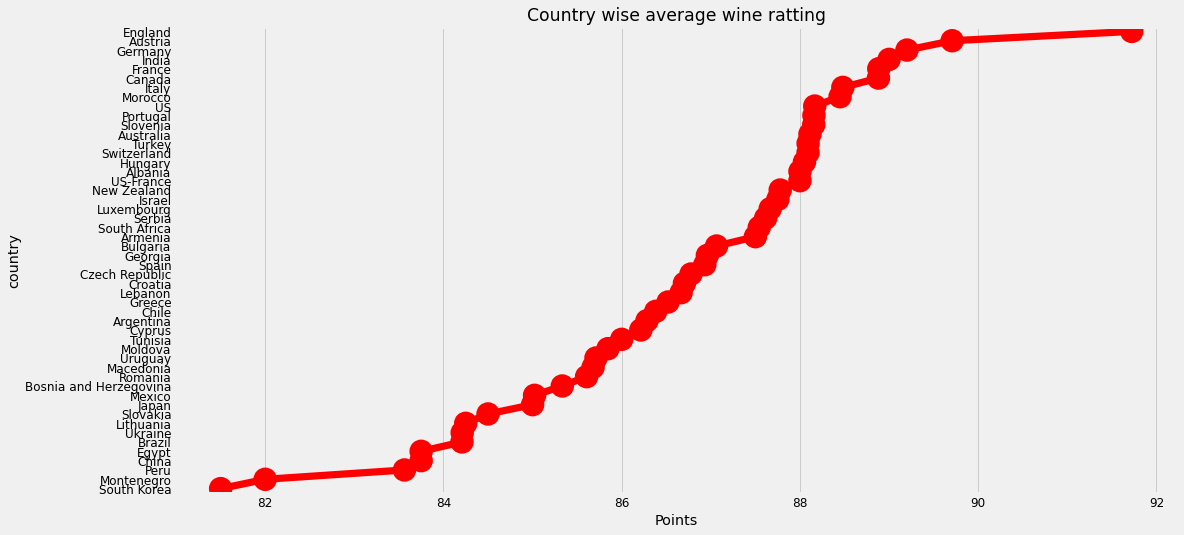

In [13]:
cnt = wine.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(16,8))
sns.pointplot(x = cnt['points'] ,y = cnt.index ,color='r',orient='h')
plt.title('Country wise average wine ratting')
plt.xlabel('Points');

* The average rating of wine for England is top in the table.
* The coutries like Austria,Germany, India, France are top quality wine producing country.
* South korea, Montenegro produces least quality wine. 
***
## Country wise Highest and Least rated wine

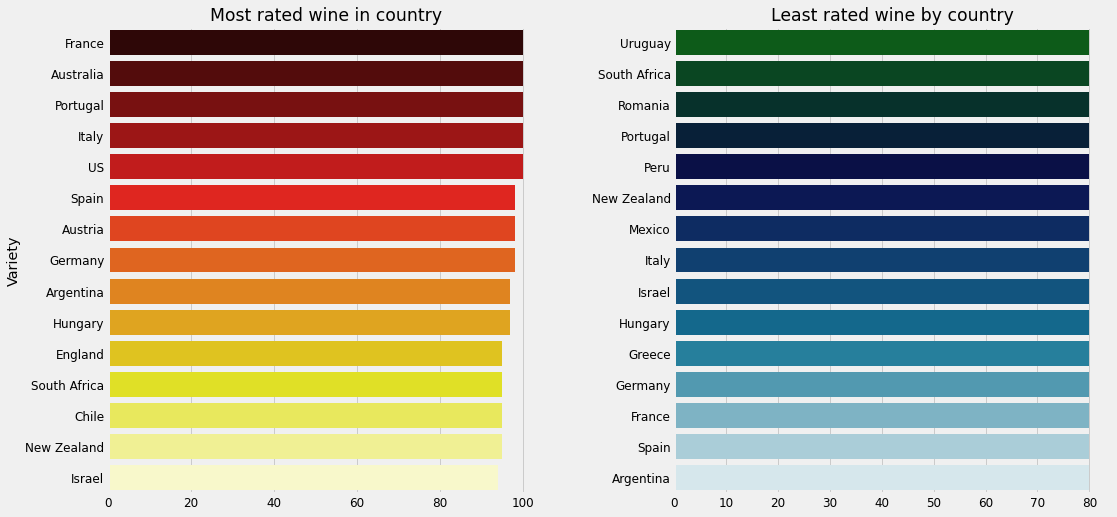

In [14]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette= 'hot',ax=ax1)
ax1.set_title('Most rated wine in country')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'ocean',ax=ax2)
ax2.set_title('Least rated wine by country')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

* The rating of wine is varies from 0 to 100, but least rating is 80.
* The wine produced in France, Australia, Portugal, Italy, US receives top rating.
* The wine produced in Urugay, South Africa, Portugal reveices least rating.

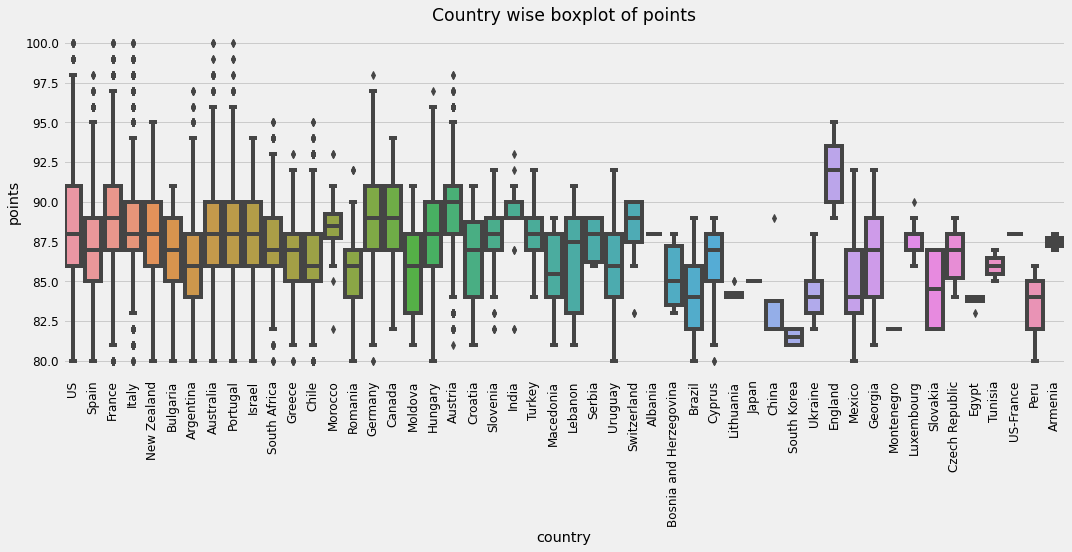

In [15]:
plt.figure(figsize=(16,6))
sns.boxplot(x = wine['country'], y = wine['points'])
#sns.pointplot(x = wine['country'], y = wine['points'])
plt.title('Country wise boxplot of points')
plt.xticks(rotation=90);

## Top most wine by variety
* Variety: the type of grapes used to make the wine (ie Pinot Noir)

Number of varity of wines 756


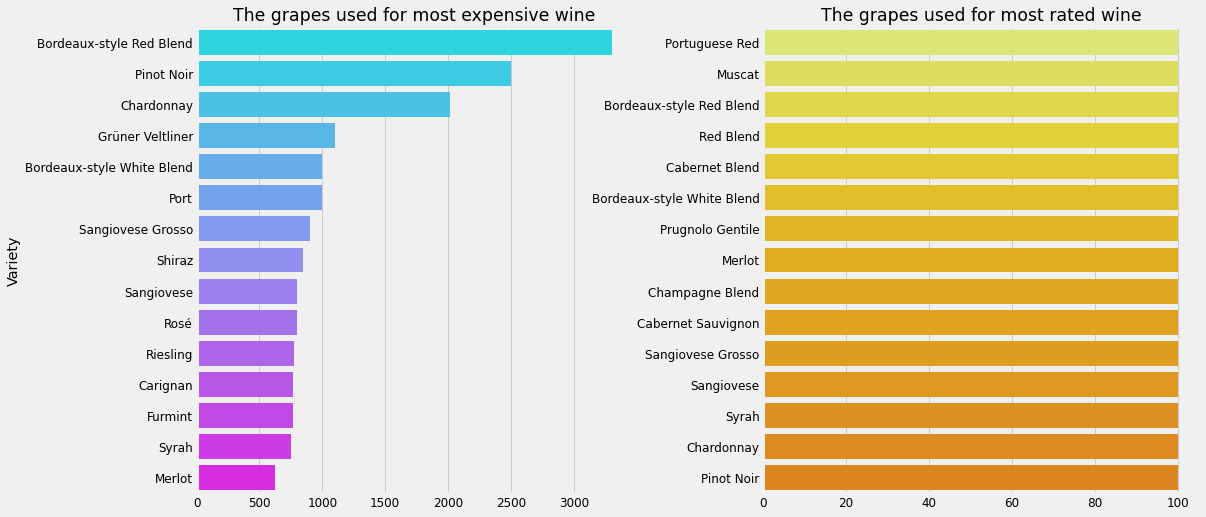

In [16]:
print('Number of varity of wines',wine['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('The grapes used for most expensive wine')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'Wistia',ax=ax2)
ax2.set_title('The grapes used for most rated wine')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

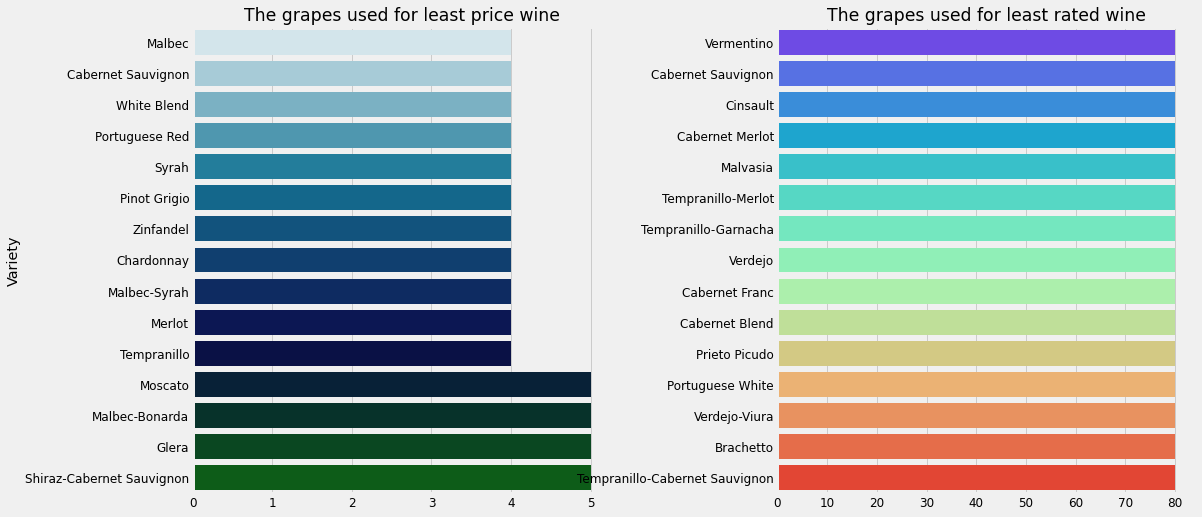

In [17]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['variety'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index,palette = 'ocean_r',ax=ax1)
ax1.set_title('The grapes used for least price wine')
ax1.set_xlabel('')
ax1.set_ylabel('Variety')

cnt = wine.groupby(['variety'])['points'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index,palette= 'rainbow', ax=ax2)
ax2.set_title('The grapes used for least rated wine')
ax2.set_xlabel('')
ax2.set_ylabel('')
plt.subplots_adjust(wspace=0.4);

In [18]:
cnt = wine.groupby(['country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending=False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='PuBu',high=0.5)

,country,points,count,min,max,mean
0,France,100,12,150.000000,1500.000000,877.583333
1,Germany,98,1,775.000000,775.000000,775.000000
2,France,99,10,159.000000,2300.000000,632.400000
3,Australia,99,2,300.000000,850.000000,575.000000
4,Portugal,100,2,450.000000,650.000000,550.000000
5,France,98,43,70.000000,1900.000000,448.813953
6,Spain,98,3,440.000000,450.000000,446.666667
7,Germany,97,16,245.000000,775.000000,392.562500
8,Portugal,99,3,268.000000,426.000000,373.333333
9,Italy,100,11,195.000000,550.000000,334.545455


## Designation
* The vineyard within the winery where the grapes that made the wine are from.
* A [vineyard](#https://en.wikipedia.org/wiki/Vineyard) is a plantation of grape-bearing vines, grown mainly for winemaking, but also raisins, table grapes and non-alcoholic grape juice. The science, practice and study of vineyard production is known as viticulture.

Number of vineyard designation 47239


/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


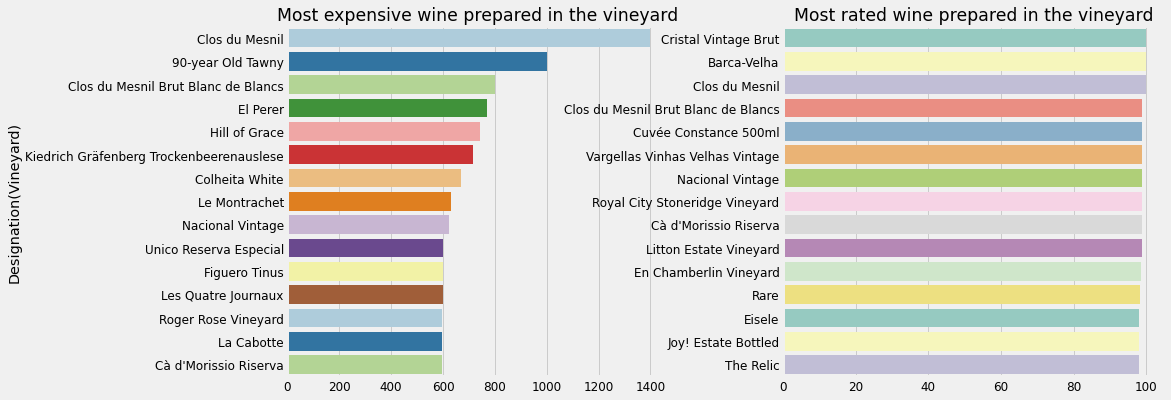

In [19]:
print('Number of vineyard designation',wine['designation'].nunique())
cnt = wine.groupby(['designation'])['price'].mean().to_frame().sort_values(by='price',ascending=False)[:15]
f,ax = plt.subplots(1,2,figsize= (14,6))
ax1,ax2 = ax.flatten()
sns.barplot(cnt['price'], y = cnt.index, palette = 'Paired', ax = ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Designation(Vineyard)')
ax1.set_title('Most expensive wine prepared in the vineyard')

cnt = wine.groupby(['designation'])['points'].mean().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'Set3', ax = ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Most rated wine prepared in the vineyard')
plt.subplots_adjust(wspace=0.3)

## Winery
* A [Winery](#https://en.wikipedia.org/wiki/Winery) is a building or property that produces wine, or a business involved in the production of wine, such as a wine company.

Number of winerys: 19186


/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/docode/.pyenv/versions/3.6.7/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


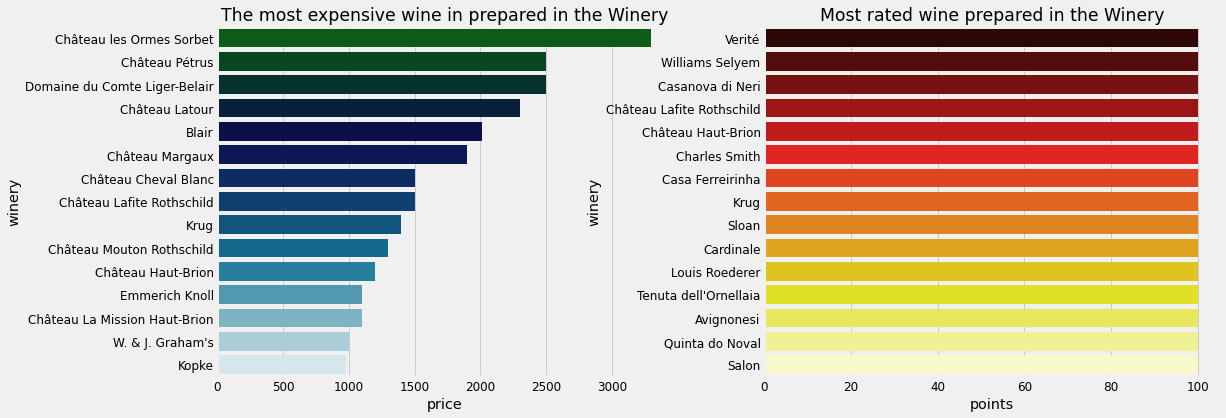

In [20]:
print('Number of winerys:',wine['winery'].nunique())
f,ax = plt.subplots(1,2,figsize=(16,6))
ax1,ax2 = ax.flatten()
cnt = wine.groupby(['winery'])['price'].max().to_frame().sort_values(by='price',ascending=False)[:15]
sns.barplot(cnt['price'],y = cnt.index,palette = 'ocean',ax = ax1)
ax1.set_title('The most expensive wine in prepared in the Winery')
cnt = wine.groupby(['winery'])['points'].max().to_frame().sort_values(by = 'points', ascending = False)[:15]
sns.barplot(cnt['points'], y = cnt.index, palette = 'hot')
plt.title('Most rated wine prepared in the Winery');

## Province
* The province or state that the wine is from

Number of province: 490


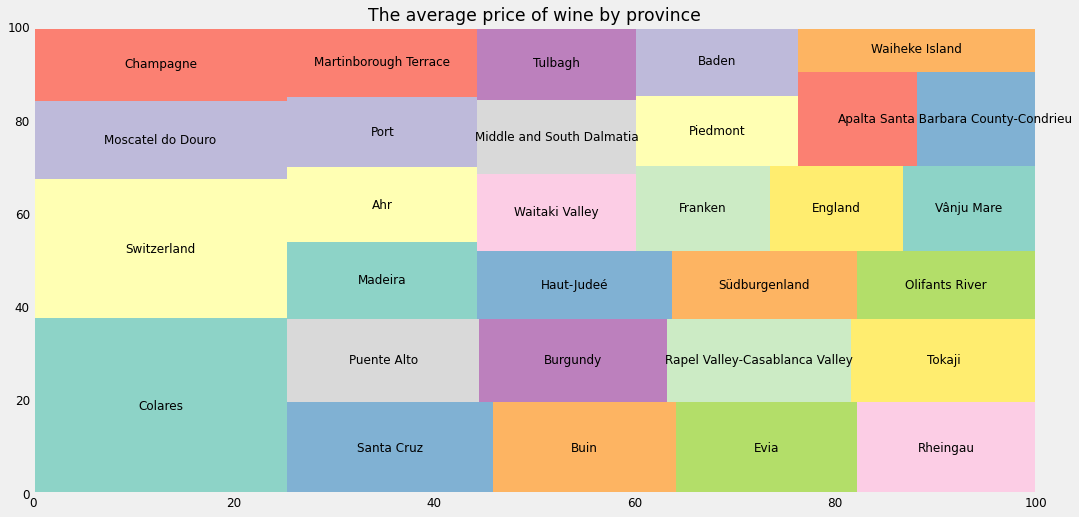

In [21]:
print('Number of province:',wine['province'].nunique())
cnt = wine.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('Set3'))
plt.title('The average price of wine by province');

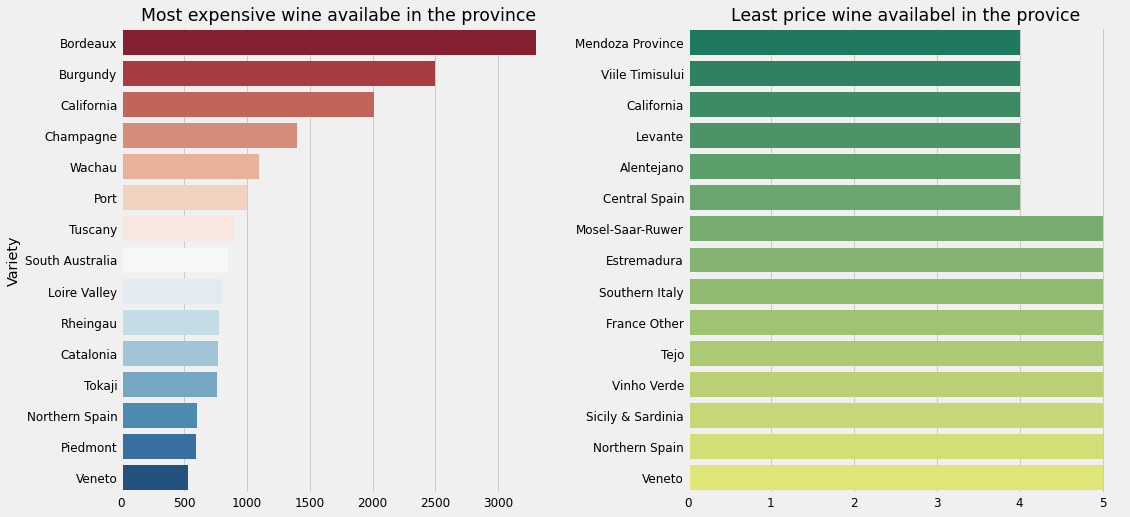

In [22]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = wine.groupby(['province'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'RdBu',ax=ax1)
ax1.set_title('Most expensive wine availabe in the province')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = wine.groupby(['province'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'summer',ax=ax2)
ax2.set_title('Least price wine availabel in the provice')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

In [23]:
cnt = wine.groupby(['province','country','points'])['price'].agg(['count','min','max','mean']).sort_values(by='mean',ascending= False)[:10]
cnt.reset_index(inplace=True)
cnt.style.background_gradient(cmap='Blues',high=0.5)

,province,country,points,count,min,max,mean
0,Bordeaux,France,99,1,2300.000000,2300.000000,2300.000000
1,Champagne,France,100,6,250.000000,1400.000000,887.666667
2,Bordeaux,France,100,6,150.000000,1500.000000,867.500000
3,South Australia,Australia,99,1,850.000000,850.000000,850.000000
4,Rheingau,Germany,98,1,775.000000,775.000000,775.000000
5,Port,Portugal,100,1,650.000000,650.000000,650.000000
6,Bordeaux,France,98,16,70.000000,1900.000000,586.062500
7,Burgundy,France,99,1,560.000000,560.000000,560.000000
8,Rheingau,Germany,97,7,445.000000,775.000000,551.571429
9,Colares,Portugal,93,1,495.000000,495.000000,495.000000


## Region1
* The wine growing area in a province or state

Number of province: 1332


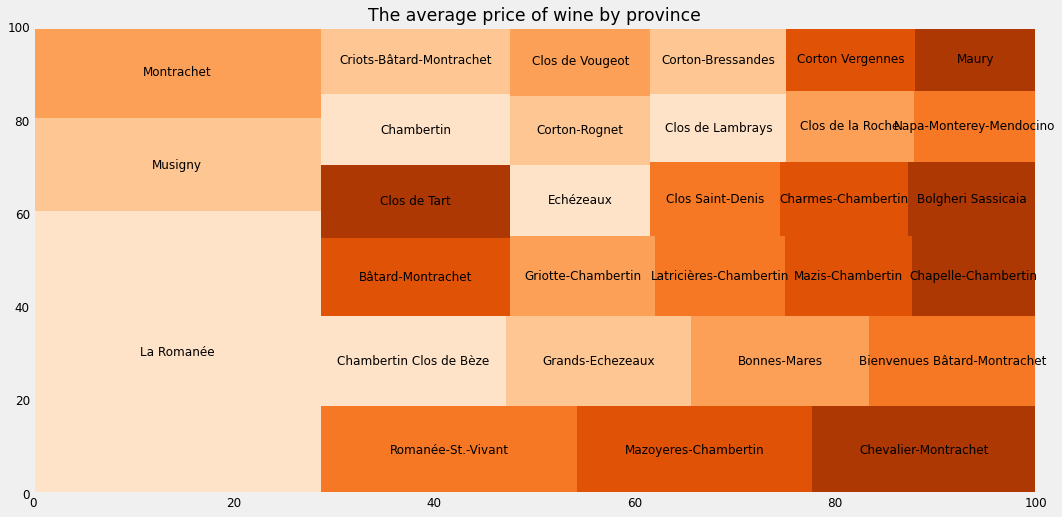

In [24]:
print('Number of province:',wine['region_1'].nunique())
cnt = wine.groupby(['region_1'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,8))
squarify.plot(cnt['price'].fillna(0.001),label=cnt.index,color= sns.color_palette('Oranges'))
plt.title('The average price of wine by province');

In [25]:
cnt = wine.groupby(['country','province','points','region_1',])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:20]
cnt.reset_index(inplace = True)
cnt.style.highlight_max()

,country,province,points,region_1,count,min,max,mean
0,France,Bordeaux,99,Pauillac,1,2300.000000,2300.000000,2300.000000
1,France,Burgundy,96,La Romanée,2,2000.000000,2500.000000,2250.000000
2,France,Bordeaux,100,Saint-Émilion,1,1500.000000,1500.000000,1500.000000
3,France,Bordeaux,100,Pauillac,1,1500.000000,1500.000000,1500.000000
4,France,Bordeaux,98,Margaux,4,380.000000,1900.000000,1140.000000
5,France,Burgundy,94,La Romanée,1,1125.000000,1125.000000,1125.000000
6,France,Champagne,100,Champagne,6,250.000000,1400.000000,887.666667
7,Australia,South Australia,99,South Australia,1,850.000000,850.000000,850.000000
8,Australia,South Australia,98,South Australia,3,850.000000,850.000000,850.000000
9,France,Bordeaux,100,Pessac-Léognan,2,848.000000,848.000000,848.000000


## Region2
* sometimes there are more specific regions specified within a wine growing area

In [26]:
print('Number of reqion2: ',wine['region_2'].nunique())
print('Null values in reqion2: ',wine['region_2'].isnull().sum())
cnt = wine.groupby(['country','province','region_1','region_2','points'])['price'].agg(
    ['count','min','max','mean']).sort_values(by = 'mean',ascending = False)[:20]
cnt.reset_index(inplace=True)
cnt.style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', 'yellow')]}])

Number of reqion2:  18
Null values in reqion2:  169437


,country,province,region_1,region_2,points,count,min,max,mean
0,US,California,Sonoma County,Sonoma,97,2,450.000000,450.000000,450.000000
1,US,California,Sonoma County,Sonoma,100,1,450.000000,450.000000,450.000000
2,US,California,Sonoma County,Sonoma,98,2,300.000000,300.000000,300.000000
3,US,California,Stags Leap District,Napa,98,1,265.000000,265.000000,265.000000
4,US,California,Atlas Peak,Napa,99,1,250.000000,250.000000,250.000000
5,US,California,Rutherford,Napa,100,2,245.000000,245.000000,245.000000
6,US,California,Napa Valley,Napa,99,7,150.000000,300.000000,238.571429
7,US,California,St. Helena,Napa,98,3,185.000000,250.000000,228.333333
8,US,California,Napa Valley,Napa,98,11,75.000000,625.000000,226.818182
9,US,California,Stags Leap District,Napa,100,1,215.000000,215.000000,215.000000


In [27]:
cnt = wine.groupby(['country','region_2']).count().reset_index()
cnt['country'].unique()

array(['US'], dtype=object)

* Region 2 details are available only for US

## Taster Name
* Name of the person who tasted and reviewed the wine

                        count unique         top   freq
taster_name            103727     19  Roger Voss  25514
taster_twitter_handle   98758     15  @vossroger  25514


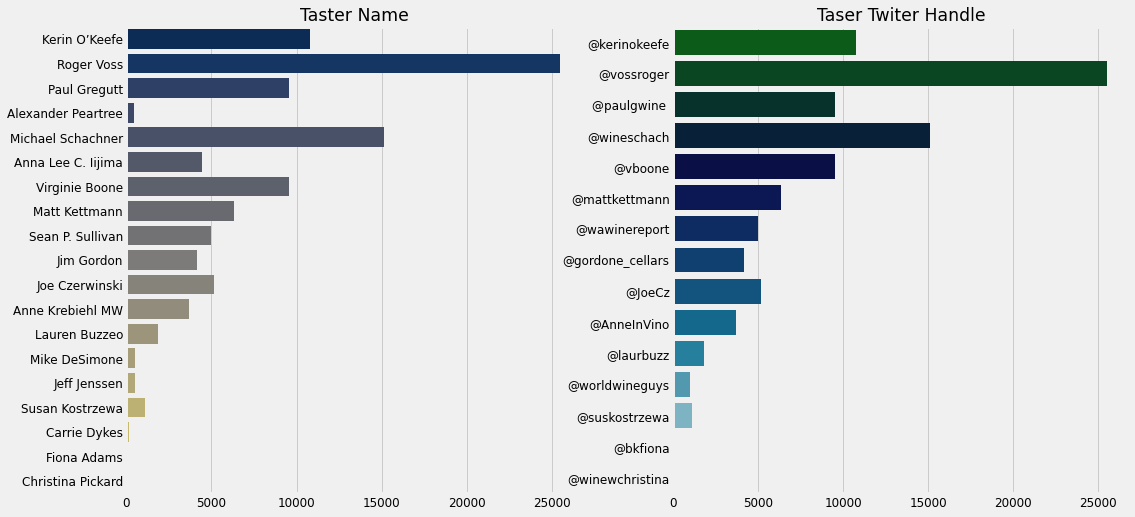

In [28]:
print(wine[['taster_name','taster_twitter_handle']].describe().T)
f,ax = plt.subplots(1,2, figsize = (16,8))
ax1,ax2 = ax.flatten()
sns.countplot(y = wine['taster_name'], palette = 'cividis', ax =ax1)
ax1.set_title('Taster Name')
ax1.set_xlabel('')
ax1.set_ylabel('')
sns.countplot(y = wine['taster_twitter_handle'], palette = 'ocean', ax =ax2)
ax2.set_title('Taser Twiter Handle')
ax2.set_xlabel('')
ax2.set_ylabel('');

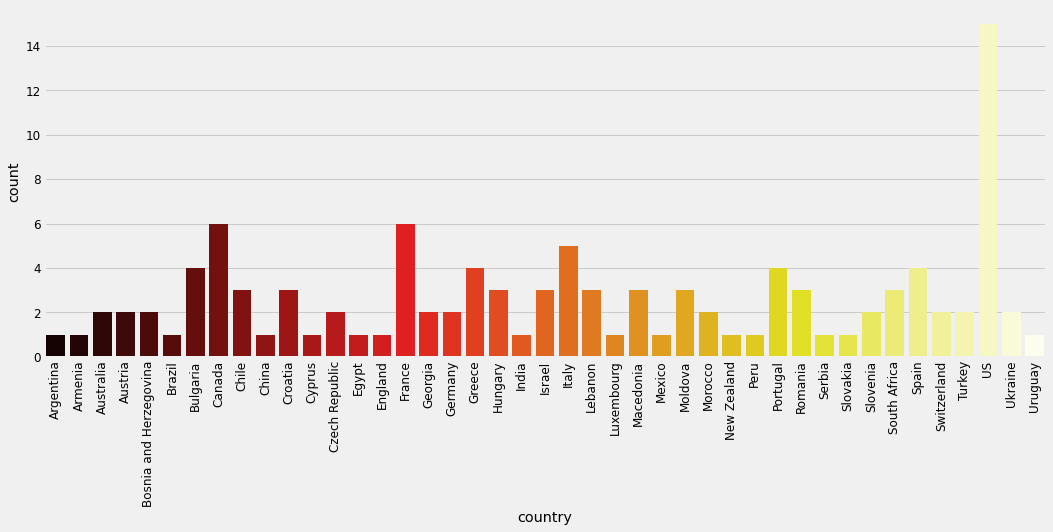

In [29]:
plt.figure(figsize = (16,6))
cnt = wine.groupby(['country','taster_name',]).count().reset_index()
sns.countplot(x = cnt['country'], palette='hot')
plt.xticks(rotation = 90);

## Collabrative filtering
A small recommender system is made using Nearest Neighbors algorithm.
    * Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B
    * Closer the vectors, smaller will be the angle and larger the cosine


In [30]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [31]:
wine1 = wine.copy()

In [32]:
# Lets choice rating of wine is points, title as user_id, and variety,
col = ['province','variety','points']
wine1 = wine[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] >85]
wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)


In [33]:
knn = NearestNeighbors(n_neighbors=10,algorithm= 'brute', metric= 'cosine')
model_knn = knn.fit(wine_pivot_matrix)

## Predict

In [34]:
query_index = np.random.choice(wine_pivot.shape[0])
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recmmendation for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    

Recmmendation for Malvasia:

1: Alicante with distance: 0.4896504259144603
2: Ansonica with distance: 0.48970731151273184
3: Malvasia Nera with distance: 0.4923452342083101
4: Rosato with distance: 0.543477414933729
5: Malvasia Bianca with distance: 0.5878727445095067
